In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import my_functions as func
import pandas as pd

In [2]:
import scipy.stats as st
from scipy.special import kolmogorov
from scipy.stats import chi2


In [2]:
uniform_distribution_file = open("U.txt", "r")
data = np.array(uniform_distribution_file.read().replace('\n', ' ').split(' ')).astype("float64")

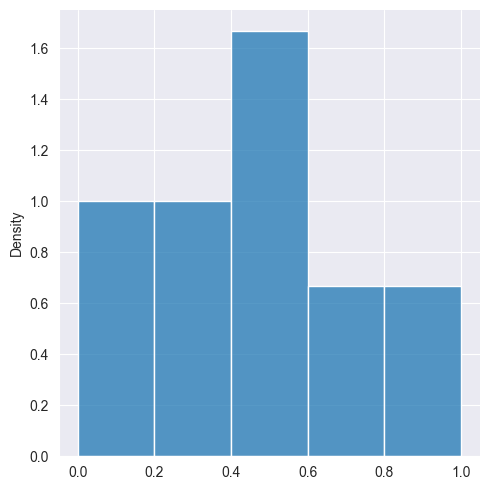

In [3]:
sns.displot(data, kind="hist", stat="density", bins=int(np.log2(data.size)) + 1, binrange=(0, 1))

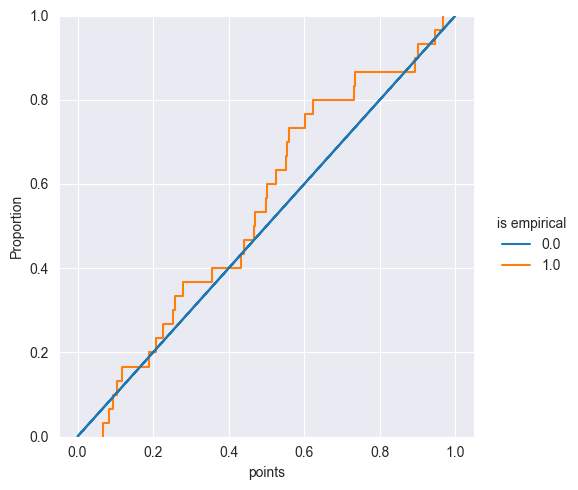

In [4]:
x = np.linspace(0, 1, 1000)

help_array = np.zeros((1000 + len(data), 2))
help_array[0:len(data), 0] = data
help_array[len(data):, 0] = x
help_array[0:len(data), 1] = 1

df = pd.DataFrame({'points': help_array[:, 0], "is empirical": help_array[:, 1]})

sns.displot(data=df, x="points", kind="ecdf", hue="is empirical")


а)
$H_1$ = {$X \sim F$} $H_2 = \overline{H_1}$
$D_n = sup_y|F^*_n(y) - F(y)|$

$$\begin{equation*}
\delta(X) =
 \begin{cases}
   H_1 &,\quad \sqrt{n} * D_n < q\\
   H_2 &,\quad \sqrt{n} * D_n \geqslant q
 \end{cases}
\end{equation*}$$

$P(\delta(X) = H_1 | H_1) = P(\sqrt{n} * D_n < q|H_1) -> K(q) = 1 - \epsilon$

In [6]:
epsilon = 0.16
q = func.find_quantile(1 - epsilon, lambda x: 1 - kolmogorov(x))  # тут вместо функции распределения "функция выживания"
q

1.123666763305664

In [7]:
y_argmax, D_n = func.find_d_n(data, lambda x: x)
(y_argmax, D_n)


(0.66, 0.18233333333333335)

In [9]:
rho = np.sqrt(30) * (D_n)
rho

0.998680796517753

0.816 < 1.12 следовательно гипотеза принимается
$\epsilon^* = P(\rho(X) > p^*) \sim P(\rho(X)>p^x | H_1) -> 1 - K(p^*) = 1 - K(0.816106)$

In [10]:
kolmogorov(rho)

0.2714164769498936

Ответ: $sup_y|F^*_n(y) - F(y)| = 0.149$ в точке 0.749, $\rho = 0.8161$, q =1.1236, $\epsilon^* = 1.123666763305664$

A1, ... , An - некоторые интервалы
\begin{displaymath}
H_1=\bigl\{\textrm{распределение } X_1 \textrm{ обладает свойством f P}\,(X_1\in A_j)=p_j \textrm{ для всех } j=1,\ldots,k \bigr\}\end{displaymath}
$$H_2 = \overline{H_1}$$
если верна $H_1$
$$\rho(X) = \sum^k_{i = 1}\frac{(v_i - n p_i)^2}{n p_i} \sim \chi^2_{k-1} $$
$P(\delta(X) = H_1 | H_1) = P(\rho(X) < q|H_1) -> H_{k-1}(q) = 1 - \epsilon$

In [11]:
k = int(np.log2(data.size)) + 1
k

5

In [12]:
func.find_rho_pirson(data, lambda x: x)

4.0

In [13]:
func.find_quantile(1 - epsilon, lambda x:chi2.cdf(x, k - 1))

6.5765380859375

$\epsilon^* = P(\rho(X) > p^*) \sim P(\rho(X)>p^* | H_1) -> 1 - H_{k-1}(p^*) = 1 - H_{k-1}(4)$

In [14]:
1 - chi2.cdf(4, k - 1)

0.40600584970983844

гипотеза принимается